### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.labelsize': 16
          }
plt.rcParams.update(params)

<ipython-input-15-1aa7dbc36600>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
data.head(10) # изучаем информацию в датасете

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info() # изучаем информацию в датасете по столбцам, сразу отмечу в датасете в нескольких столбцах присутствует много пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

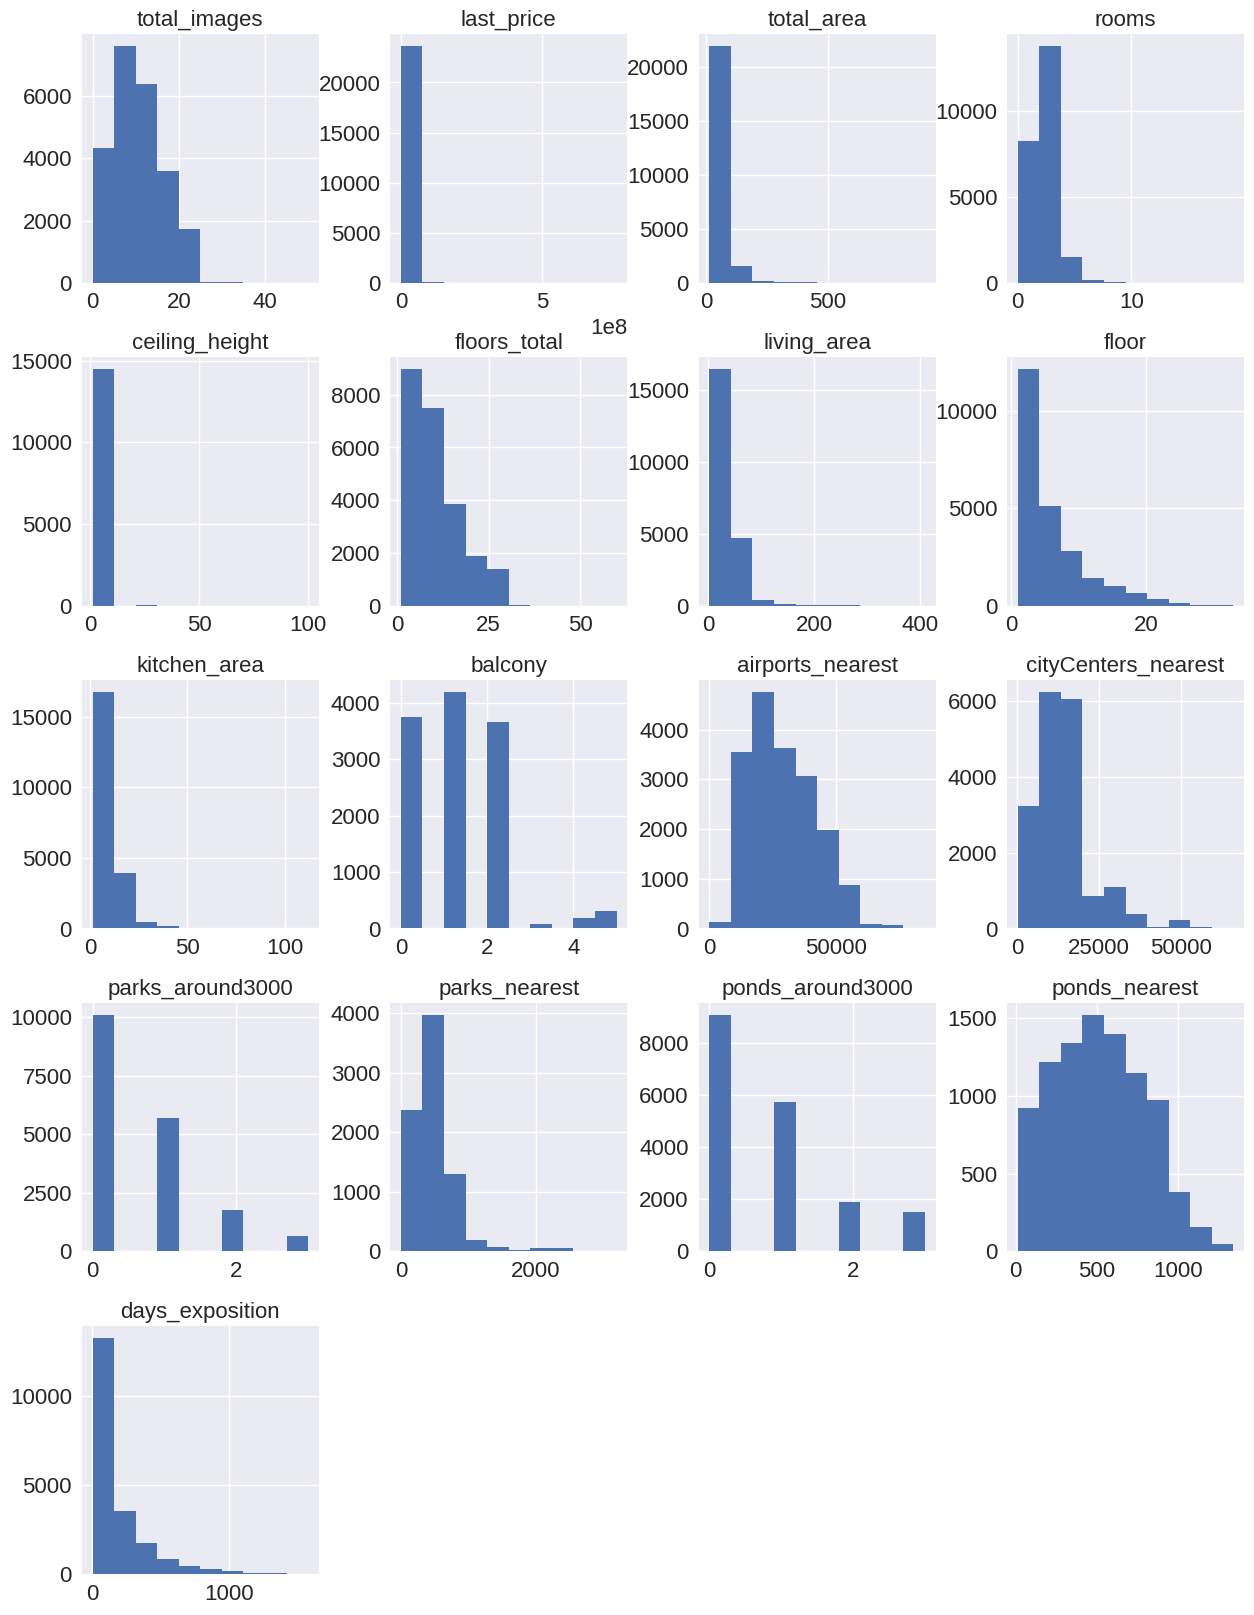

In [ ]:
data.hist(bins=10, figsize=(15, 20)); # отрисовываем наши гистрограммы

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

In [ ]:
data.isna().sum() # Выведем количество пропущенных значений для каждого столбца

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) ')

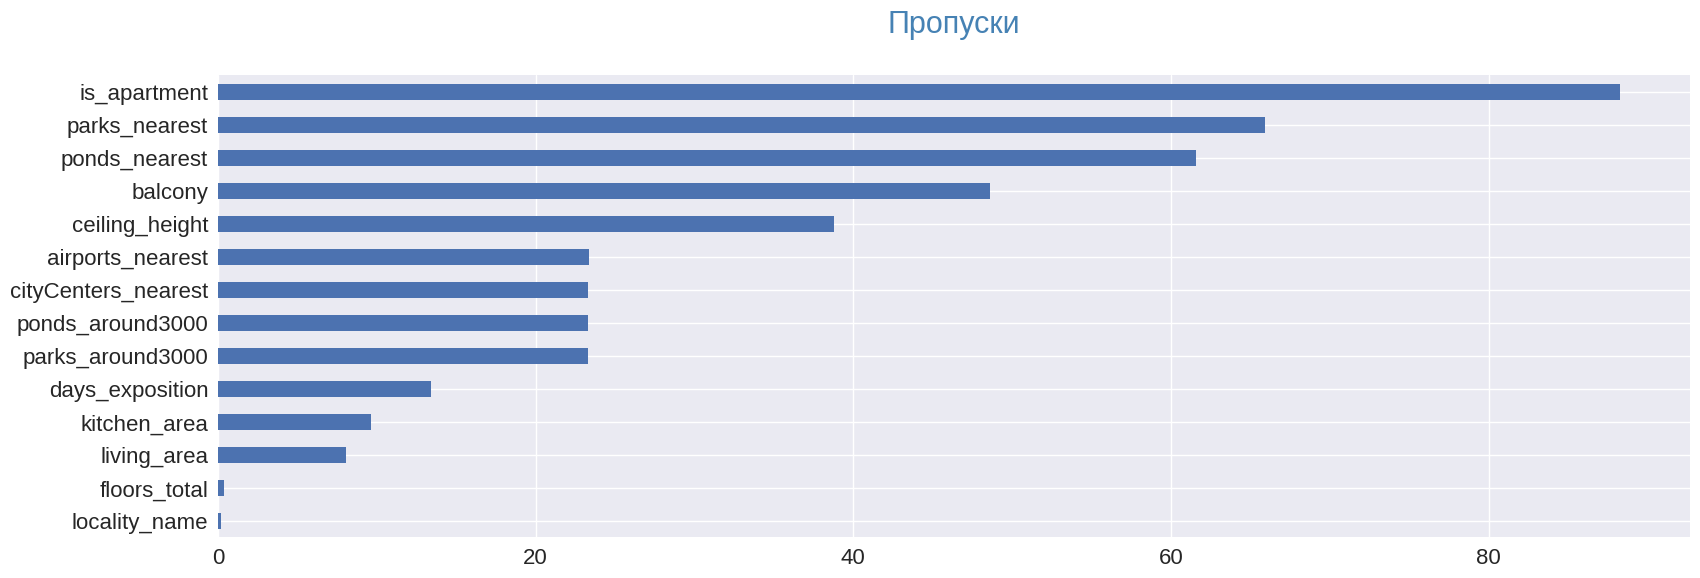

In [ ]:
pass_value_barh(data)

Разберемся с каждым по одному, `ceiling_height` высота потолка, число пропусков 9195, этот показатель не целевой (не приоритетный при выборе квартиры), заменить пропуски мы не сможем и удалять также не будем, поэтому оставим все как есть.
Причина пропусков может быть отсутсвие данных или человеческих фактор

In [ ]:
data['ceiling_height'].median() # найдем медиану выборки, может на последних этапах заменим на медиану

2.65

`floors_total` Всего этажей в доме, число пропусков 86, число пропусков мало, и мы можем заполнить значения, благо есть зависимый параметр `floor`. Заполним пропуски значением этажа.
Причина пропусков отсутсвие данных или человеческих фактор, но, так как число пропусков мало склоняюсь ко второму.

In [ ]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']
# находим пропуски с методом isna и заполняем

In [ ]:
data['floors_total'].isna().sum() # проверка, от пропусков избавились

0

`is_apartment` аппартаменты, число пропусков 20924, число пропусков достаточно большое, при этом это булевый тип. Проверим уникальные значения в признаке. Оставим все как есть. Причина пропусков ошибки при выгрузке данных или отсутствие данных.

In [ ]:
data['is_apartment'].value_counts() # и по распределению только 50 значения True, можно предположить что на стадии формирования
# датасета закралась техническая ошибка и вместо False поля не заполнялись, ибо у нас датасет по квартирам, а не по аппартаментам.

,count
is_apartment,
False,2725
True,50


`living_area` жилая площадь, число пропусков 1903, число пропусков достаточно, при этом это ключевой показатель и у нас есть взаимосвязь с `total_area`. Причина пропусков отсутсвие данных или человеческих фактор.
Предложение такое категоризировать данные создать столбец, чтобы с помощью него смогли заполнить пропуски усеченным средним значением на 5 процентов. И мы не будем создавать функцию, а пройдемся по кол-ву комнат.  


In [ ]:
data['living_area'].corr(data['total_area']) # очень сильная взаимосвязь с помощью нее и заполним пропуски.

0.9395373338721491

In [ ]:
data['total_area'].describe() # Смотрим распределение по этим данным и будем разделение на 4 группы

,total_area
count,23699.000000
mean,60.348651
std,35.654083
min,12.000000
25%,40.000000
50%,52.000000
75%,69.900000
max,900.000000


Создадим функцию категорирования площади `categorize_area`, которая разделит наши данные на категории:

- 0–40 — `'D'`;
- 40–51 — `'C'`;
- 52–69 — `'B'`;
- 69,9–900 — `'A'`.


In [ ]:
def categorize_area(area):
    # создаем функцию с условиями выше
    try:
        if 0 <= area < 40:
            return 'D'
        elif 40 <= area < 52:
            return 'C'
        elif 52 <= area < 69.9:
            return 'B'
        elif area >= 69.9:
            return 'A'
    except:
        pass

In [ ]:
data['total_area_category'] = data['total_area'].apply(categorize_area) # применяем функцию к нашему датасету

In [ ]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    stats.trim_mean(data.loc[(data['rooms'] == t), 'living_area'] , 0.05 )
# выбираем по количеству комнат заполняем усеченным средним


In [ ]:
data['living_area'].isna().sum() # проверка, от пропусков избавились

1903


Проведем проверку данных по формуле total_area*0.9 <= (living_area + kitchen_area)
 475 было до добавления, 475 после добавления.

In [ ]:
test_2 = data.loc[data['total_area'] * 0.9 <= (data['living_area'] + data['kitchen_area']), ['living_area', 'kitchen_area', 'rooms']]

In [ ]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 41 to 23680
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   living_area   475 non-null    float64
 1   kitchen_area  475 non-null    float64
 2   rooms         475 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.8 KB


In [ ]:
data['kitchen_area'].isna().sum()

2278

In [ ]:
data['kitchen_area'].corr(data['total_area']) # средняя взаимосвязь

0.6091211711198314

`kitchen_area` площадь кухни, число пропусков после преобразований 2278, для площади кухни не все так однозначно, как `living_area`.Взаимосвязь есть, но она такая сильная (0.609). Оставим все как есть. Причина пропусков ошибки при выгрузке данных или отсутствие данных.

`balcony` количество балконов, число пропусков 11519, ранее уже было оговорено, что пропуски в балконах, может означать, что их нет и можно заменить на 0. Причина пропусков ошибки при выгрузке данных или отсутствие данных.

In [ ]:
data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'].isna().sum() # проверка, от пропусков избавились

0

`locality_name` название населенного пункта, число пропусков 49, данный критерий мы не сможем ни подобрать ни угадать, поэтому просто удалим пропуски, благо их всего 49. Причина пропусков отсутсвие данных или человеческих фактор.

In [ ]:
data = data.dropna(subset=['locality_name']) # удаляем пропуски
data['locality_name'].isna().sum() # проверка, от пропусков избавились

0

`airports_nearest` расстояние до аэропорта, число пропусков 5542, у данного критерия разброс от 0 до 60_000. Предположение такое, что рядом с этими квартирами просто нет аэропорта в 60 км поблизости и никто не замерял. Оставим все как есть. Причина пропусков отсутсвие данных или человеческих фактор.

`cityCenters_nearest` расстояние до центра, число пропусков 5519, у данного критерия разброс от 0 до 60_000. Аналогичная ситуация что и с `airports_nearest`. Центр мы берем центр Санкт-Петербурга. Оставим все как есть. Вообще можно заметить число пропусков у `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` число пропусков колеблется около 5519. Скорей всего у всех этих экземпляров либо нет данных критерией и заполнить их не предоставляется возможным, также возможен вариант, что на этапе выгрузки данных произошел сбой и часть данных потерялась. При этом хочеться отметить, что `parks_around3000`, `ponds_around3000` мы можем заполнить нулями, так как по графикам у них и так пик в нуле. Для всех остальных данных оставим все как есть, пусть будут пропуски, стоит отметить, что это всё картографические данные. Причина пропусков отсутсвие данных или человеческих фактор.

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_around3000'].isna().sum() # проверка, от пропусков избавились

<ipython-input-38-745156eeee77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
<ipython-input-38-745156eeee77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)


0

`parks_nearest` расстояние до парка, число пропусков 15620. Предположение такое, что рядом с этими квартирами просто нет парка поблизости и никто не замерял. Оставим все как есть, график распределения похож на пуасоновский, аналогичная ситуация с `ponds_nearest`, пропуски важный элемент в данных. Причина пропусков отсутсвие данных или человеческих фактор.

`days_exposition` количество дней у объявления, число пропусков 3181. Предположение такое, что квартиры еще ищут своих покупателей. Заполнять значение нулями, нет смысла, как и удалять. Оставим все как есть. Причина пропусков отсутсвие данных или человеческих фактор.

#### Рассмотрите типы данных в каждом столбце:

In [ ]:
data.info() # проверяем типы данных наших столбцов

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest      18

Сразу отметим столбцы, по которым у нас возникают вопрос в типе данных: first_day_exposition (datetime64[ns]), floors_total (int64), is_apartment (bool), balcony (int64), days_exposition (int64). Во всех столбцах логически предлогает другой тип данных. Все столбцы можно преобразовать кроме, days_exposition , так как мы не заполнили пропуски. Некритично что у нас дни не целые числа, продолжим анализ.
P.S. Если в ходе анализа необходимо преобразование то вернемся на шаг заполнения пропусков.

In [ ]:
data['first_day_exposition'].head() # Проверяем данные в столце даты публикации, преобразуем

,first_day_exposition
0,2019-03-07T00:00:00
1,2018-12-04T00:00:00
2,2015-08-20T00:00:00
3,2015-07-24T00:00:00
4,2018-06-19T00:00:00


In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # преобразовали данные

In [ ]:
data['floors_total'] = data['floors_total'].astype('int64')

In [ ]:
data['is_apartment'] = data['is_apartment'].astype('bool') # после преобразования все пропуски стали true, пока непонятно на что это скажется

In [ ]:
data['balcony'] = data['balcony'].astype('int64')

In [ ]:
data['parks_around3000'] = data['parks_around3000'].astype('int64') # преобразовали в целочисленный тип

In [ ]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony              

#### Изучите уникальные значения

In [ ]:
unique_values = list(data['locality_name'].sort_values().unique()) # 346 уникальныых значения в них есть неявные дубликаты
unique_values

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [ ]:
duplicates = ['городской', 'коттеджный',  'деревня', 'городского типа',
              'поселок', 'при железнодорожной', 'станции', 'имени',
              'городской', 'посёлок', 'садовое', 'товарищество',
              'садоводческое некоммерческое', 'село']
#  в списке находятся все слова, которые мы хотим убрать, чтобы получилось только названия.
unique_local_name = []
for value in unique_values:
    for word in duplicates:
        value = value.replace(word,'')
    unique_local_name.append(value.lstrip())
# убрали лишние слова оставили только названия set(only_local_name) это наши названия без повторов.

In [ ]:
def clear_name(name):
    # создаем функцию, которая принимает значения строка name. С помощью данной функции создадим столбец с очищенным именем.
    # Например на вход поступает 'садовое товарищество Приладожский' функция выдает Приладожский.
    global unique_local_name
    try:
        for value in unique_local_name:
            if value in name:
                return value
    except:
        pass

In [ ]:
data['clear_locality_name'] = data['locality_name'].apply(clear_name) # создаем новый столбец

In [ ]:
data['clear_locality_name'].head(20) # смотрим на результат, получилось значения очищены

,clear_locality_name
0,Санкт-Петербург
1,Шушары
2,Санкт-Петербург
3,Санкт-Петербург
4,Санкт-Петербург
5,Янино-1
6,Парголово
7,Санкт-Петербург
8,Мурино
9,Санкт-Петербург


In [ ]:
data = data.drop('locality_name', axis=1) # удалим столбец с излишней информацией

In [ ]:
data = data.rename(columns={'clear_locality_name': 'locality_name'}) # переменуем обратно наш очищенный столбец

In [ ]:
# check
data['locality_name'].nunique()

291

#### Найдите и устраните редкие и выбивающиеся значения.

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .99, .9976])
    .style.format("{:,.2f}")
) # сделаем срез данных по процентилям, которые высчитали.

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,25.17,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.500000,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.990000,5.00,197.56,3.82,"1,069.00","36,000,000.00",120.00,35.06,23.00,26.00
0.997600,7.00,309.77,5.22,"1,311.62","82,000,000.00",181.44,50.00,25.00,27.00


In [ ]:
# посмотрим распределение по количеству комнат. Видим что есть аномальные значения (8:19)
data['rooms'].value_counts()
# уберем все квартиры, где количество комнат больше 7

,count
rooms,
1,8036
2,7924
3,5797
4,1175
5,326
0,197
6,105
7,59
8,12


In [ ]:
data = data.query('0 < rooms < 8') # сделали срез данных кол-во комнат от 0 до 7

In [ ]:
data['ceiling_height'].sort_values().unique() # посмотрим уникальные значения в столбце высота потолка.

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,
      

Итак в таблице представлены все значения, будем честны, потолки в 1 метр сложно представить, основываясь на личном опыте потолки выше 5 метров тоже сложно представить. Но если потолки свыше 20 метров можно предположить, что произошла ошибка и точку неправильно поставили, то со 100 метров дело обстоит иначе. Отсюда возникает предложение все потолки высотой от 20 до 30 метров перевести в интервал от 2 до 3 метров. Так же необходимо отбросить выбросы, в нашем случае это значения не попадающие в промежуток 2,5 до 3,5 метров.

In [ ]:
def limit_ceiling(height):
    # создаем функцию, которая принимает значения height. С помощью данной функции мы будем возвращать измененные значения высоты.
    # Например на вход поступает 32 м функция выдаст 3,2 м. Если поступает на вход 2,65 вернет туже величину.
    try:
        if (2.5 <= height < 5.22) and (height != 'nan'):
            return height
        if 25 <= height <= 35:
            return height / 10
    except:
        pass

In [ ]:
data['ceiling_height'] = data['ceiling_height'].map(limit_ceiling) #  применили нашу функцию ко все экземплярам.

In [ ]:
data['floors_total'].value_counts() # посмотрим уникальные значения в столбце этажа зданий.

,count
floors_total,
5,5760
9,3751
12,1360
16,1357
4,1193
10,1172
25,1047
6,907
17,816


Интересно, что одноэтажных зданий всего 19. Мы отфильтруем значения и оставим в датасете значения от 2 до 27

In [ ]:
data = data.query('2 <= floors_total <= 27') # сделали срез данных кол-во этажей от 2 до 26

In [ ]:
data['total_area'].describe()

,total_area
count,23342.000000
mean,60.265598
std,34.183494
min,12.000000
25%,40.100000
50%,52.000000
75%,70.000000
max,631.200000


In [ ]:
data = data.query('25.17 <= total_area <= 310') # сделали срез данных по площади от 25 до 310

In [ ]:
data['living_area'].describe()

,living_area
count,21315.000000
mean,34.195235
std,19.689516
min,2.000000
25%,18.800000
50%,30.000000
75%,42.400000
max,250.000000


##### check nan

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23141 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23141 non-null  int64         
 1   last_price            23141 non-null  float64       
 2   total_area            23141 non-null  float64       
 3   first_day_exposition  23141 non-null  datetime64[ns]
 4   rooms                 23141 non-null  int64         
 5   ceiling_height        14179 non-null  float64       
 6   floors_total          23141 non-null  int64         
 7   living_area           21315 non-null  float64       
 8   floor                 23141 non-null  int64         
 9   is_apartment          23141 non-null  bool          
 10  studio                23141 non-null  bool          
 11  open_plan             23141 non-null  bool          
 12  kitchen_area          21201 non-null  float64       
 13  balcony              

In [ ]:
data = data.query('13 <= living_area <= 180') # сделали срез данных по площади от 13 до 180

In [ ]:
# check
data.shape[0]

21133

In [ ]:
data['last_price'].describe()

,last_price
count,2.113300e+04
mean,6.302418e+06
std,7.504078e+06
min,1.219000e+04
25%,3.500000e+06
50%,4.700000e+06
75%,6.800000e+06
max,3.300000e+08


In [ ]:
data = data.query('400_000 <= last_price <= 65_000_000') # сделали срез данных. Все основные столбцы от аномальных значений убрали.

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21083 entries, 0 to 23696
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21083 non-null  int64         
 1   last_price            21083 non-null  float64       
 2   total_area            21083 non-null  float64       
 3   first_day_exposition  21083 non-null  datetime64[ns]
 4   rooms                 21083 non-null  int64         
 5   ceiling_height        13296 non-null  float64       
 6   floors_total          21083 non-null  int64         
 7   living_area           21083 non-null  float64       
 8   floor                 21083 non-null  int64         
 9   is_apartment          21083 non-null  bool          
 10  studio                21083 non-null  bool          
 11  open_plan             21083 non-null  bool          
 12  kitchen_area          20554 non-null  float64       
 13  balcony              

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,083.00","21,083.00","13,296.00","18,176.00","21,083.00","21,083.00","20,554.00","21,083.00","21,083.00"
min,1.00,25.20,2.50,1.00,"430,000.00",13.00,1.30,1.00,2.00
max,7.00,301.90,4.80,"1,580.00","65,000,000.00",180.00,100.70,27.00,27.00


In [ ]:
# check
data.rooms.value_counts().to_frame()

,count
rooms,
2,7224
1,7093
3,5318
4,1061
5,270
6,81
7,36


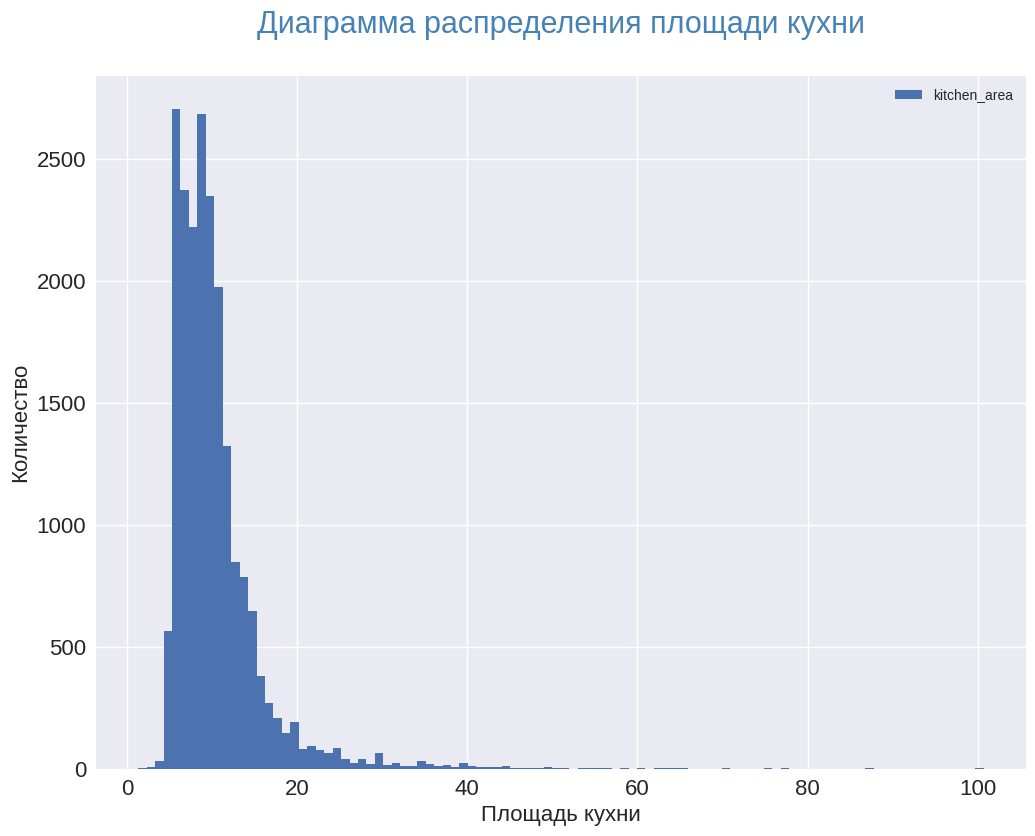

In [ ]:
data['kitchen_area'].hist(figsize=(12,9), bins=100, legend=True)
plt.title('Диаграмма распределения площади кухни' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество');

Распределение нормальное, смещенное влево с средним 10.7 м2 и с медианой 9 м2

In [ ]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .99, .9976])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,29.00,2.50,4.00,"1,060,000.00",14.00,5.00,1.00,2.00
0.500000,2.00,52.10,2.65,102.00,"4,690,000.00",30.10,9.00,4.00,9.00
0.990000,5.00,170.92,3.70,"1,074.25","29,000,000.00",104.00,33.00,22.00,26.00
0.997600,6.00,225.40,4.00,"1,312.38","46,970,160.00",145.44,45.00,25.00,27.00


Ищем аномалии в столбцах kitchen_area и days_exposition.



In [ ]:
def limit_area(area):
    # создаем функцию, которая принимает значения area. С помощью данной функции мы будем возвращать отфильтрованные значения.
    # Условие такое, что нас устраювают только значения на отрезке от 5 до 34.
    try:
        if (5 <= area <= 34):
            return area
        if not area: return
    except:
        pass

In [ ]:
data['kitchen_area'] = data['kitchen_area'].map(limit_area) # применяем фильтр

In [ ]:
def limit_days(days):
    # создаем функцию, которая принимает значения days. С помощью данной функции мы будем возвращать отфильтрованные значения.
    # Условие такое, что нас устраювают только значения на отрезке от 0 до 1070.
    try:
        if (0 <= days <= 1070):
            return days
        if not days: return
    except:
        pass

In [ ]:
data['days_exposition'] = data['days_exposition'].map(limit_days) # применяем фильтр, обработали аномальные значения

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
data['price_per_one'] = data['last_price'] / data['total_area'] # цена одного квадратного метра;

In [ ]:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday # день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [ ]:
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяц публикации объявления;

In [ ]:
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year # год публикации объявления;

In [ ]:
data.loc[:, 'floor_type'] = 'другое' # тип этажа квартиры (значения — «первый», «последний», «другой»);
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
# распределили значения

In [ ]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений). 21148
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'].dropna() / 1000).round()

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:

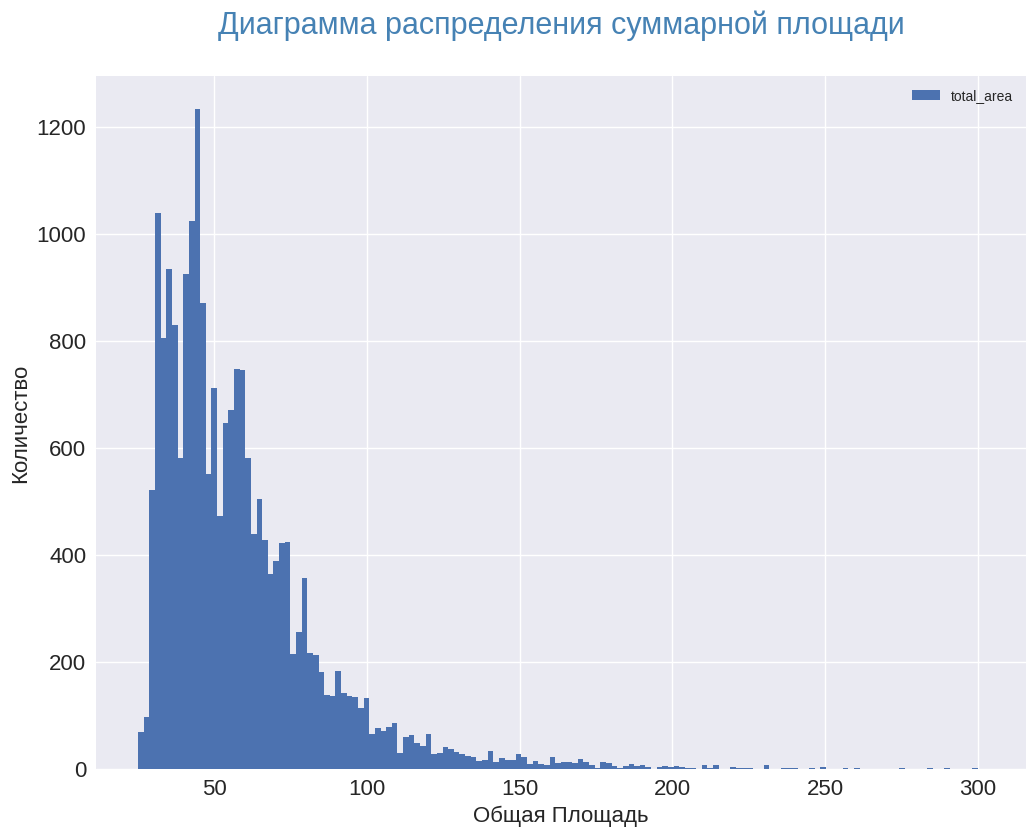

In [ ]:
data['total_area'].hist(figsize=(12,9), bins=150, legend=True)
plt.title('Диаграмма распределения суммарной площади' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Общая Площадь')
plt.ylabel('Количество');

График похож на распределения Пуассона. Моду значений наблюдаем в районе 45 м2, среднее 59 м2.


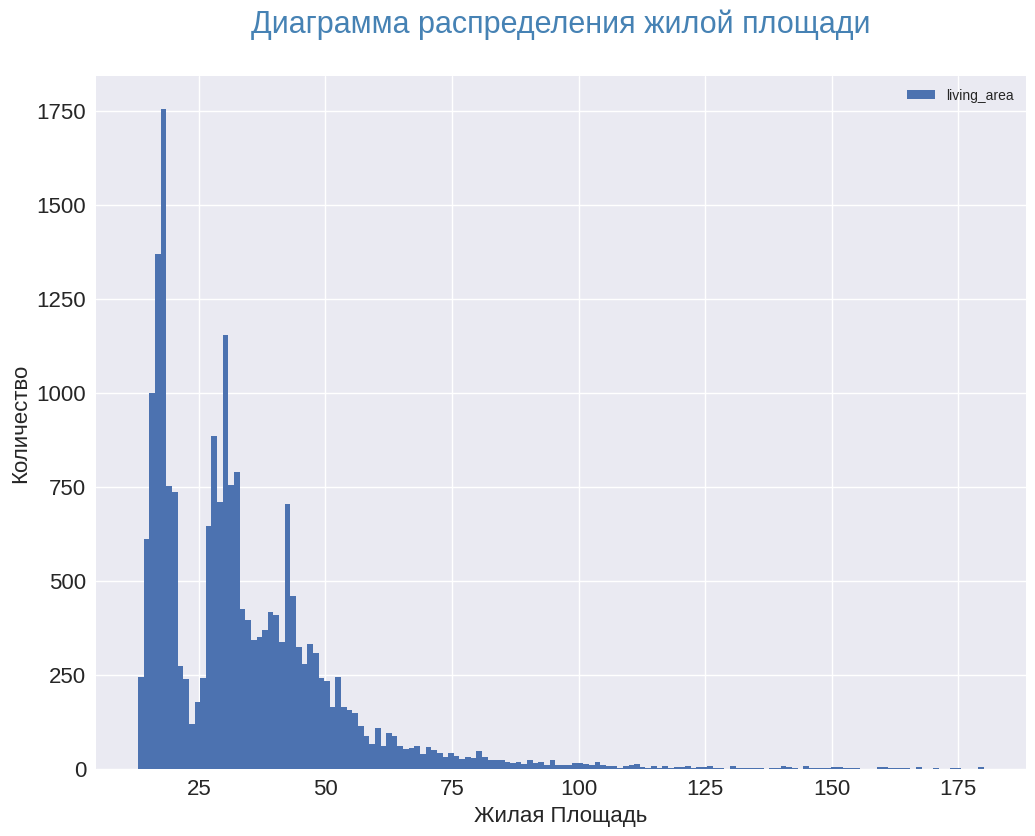

In [ ]:
data['living_area'].hist(figsize=(12,9), bins=150, legend=True)
plt.title('Диаграмма распределения жилой площади' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Жилая Площадь')
plt.ylabel('Количество');

График при малых корзинах (bins < 15) похож на предыдущий, что неудивительно ведь корелляция 0,92. Но при увеличении корзин, сразу можно заметить что график меняет форму. У графика появляется два пика в районе 18 и 30. На прошлом тоже можно было такое заметить, но и за более разнообразных значений пик сгладился. При увеличении площади график стремится к нулю.

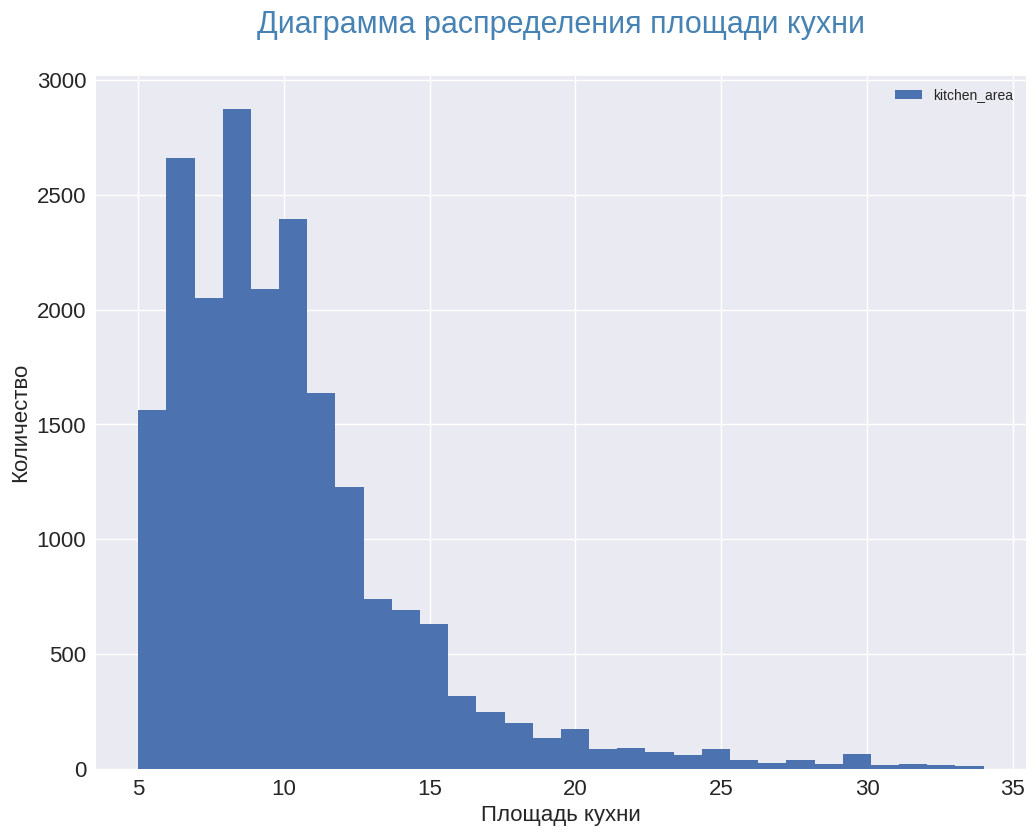

In [ ]:
data['kitchen_area'].hist(figsize=(12,9), bins=30, legend=True)
plt.title('Диаграмма распределения площади кухни' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество');

Форма графика аналогична предыдущим имеется два пика около 6 и 8. В прочем похожесть графиков неудивительная ведь параметры взаимосвязные друг с другом.

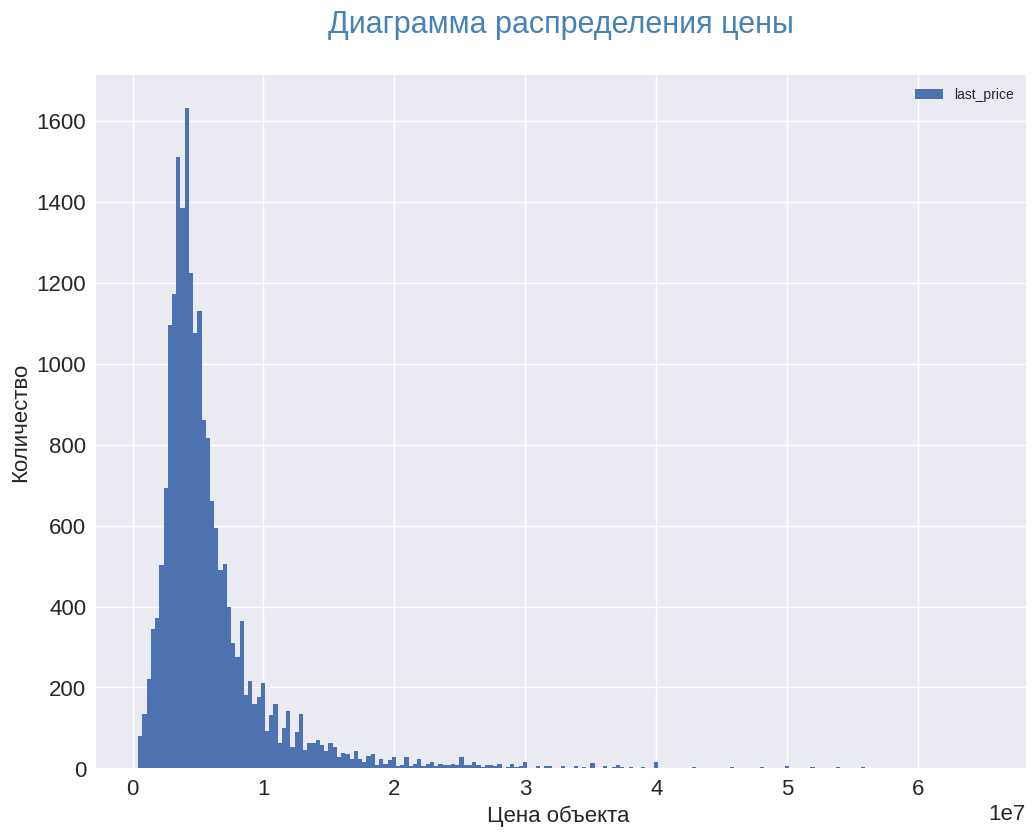

In [ ]:
data['last_price'].hist(figsize=(12,9), bins=200, legend=True)
plt.title('Диаграмма распределения цены' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Цена объекта ')
plt.ylabel('Количество');

Форма графика аналогична нормальному закону распределения с мат.ожидаем 4_500_000 рублей.

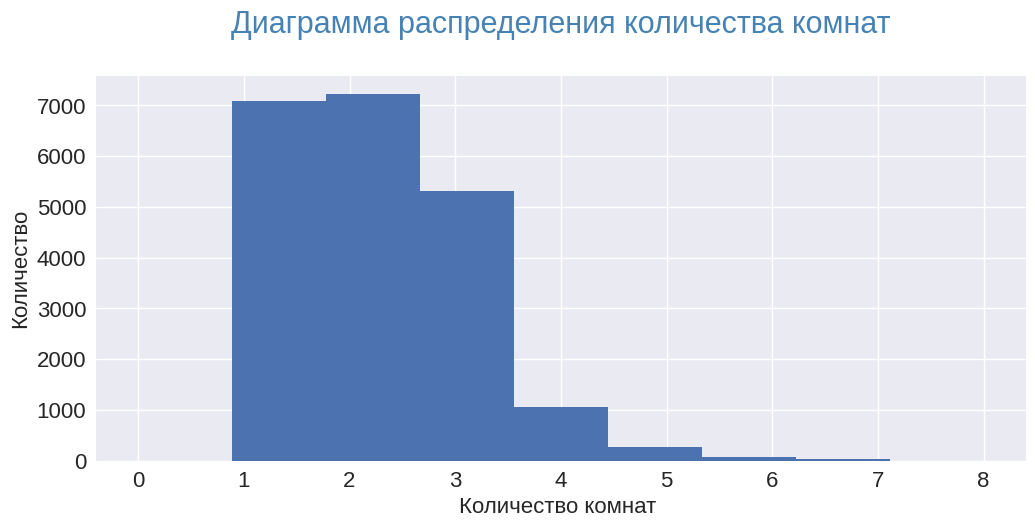

In [ ]:
data.hist('rooms', bins=9, range=(0, 8), figsize=(12,5))
plt.title('Диаграмма распределения количества комнат' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Количество комнат ')
plt.ylabel('Количество'); # количество комнат;

Итак мы видим, что форма графика опять имеет Пуассоновский закон распределения.

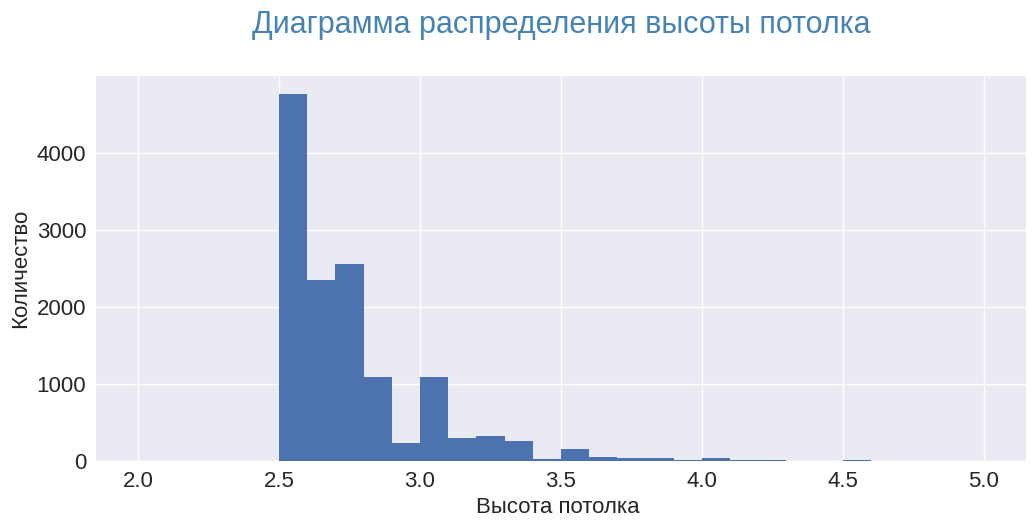

In [ ]:
data.hist('ceiling_height', bins=30, range=(2, 5), figsize=(12,5))
plt.title('Диаграмма распределения высоты потолка' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Высота потолка ')
plt.ylabel('Количество'); # высота потолков;

Итак мы видим, что форма графика опять имеет Пуассоновский закон распределения, хоть и есть выбросы. Значения сконцентрированы на участке от 2,5 до 3,5 м.

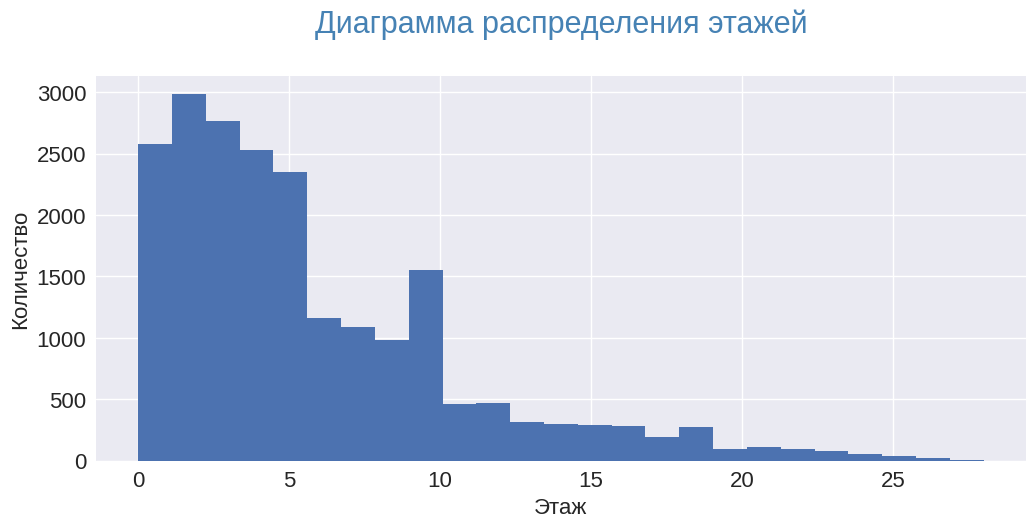

In [ ]:
data.hist('floor', bins=25, range=(0, 28), figsize=(12,5))
plt.title('Диаграмма распределения этажей' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Этаж')
plt.ylabel('Количество'); # этаж квартиры;

Итак мы видим, что форма графика опять имеет Пуассоновский закон распределения. Значения распределены на участке от 0 до 26

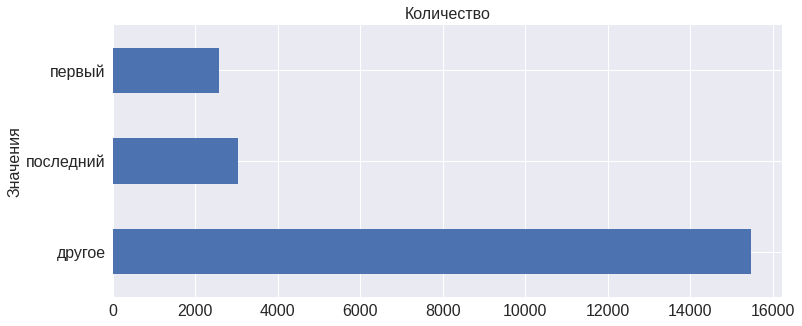

In [ ]:
data['floor_type'].value_counts().plot(
    kind='barh',
    grid=True,
    title='Количество',
    ylabel='Значения',
    figsize=(12,5)); # тип этажа квартиры

На графике видим три категории, причем две категории почти равны, это первый и последний. А также доминирование категории `другое`

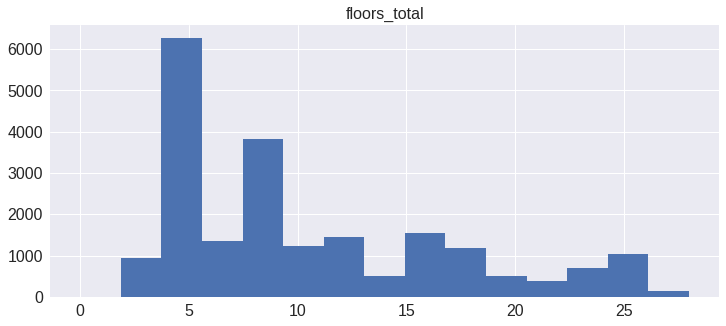

In [ ]:
data.hist('floors_total', bins=15, range=(0, 28), figsize=(12,5)); # общее количество этажей в доме;

Сложно сказать, что за распределение на графике, в виду того что имеются несколько пиков значений (5, 9, 12, 16). С логической точки зрения это легко понять, потому что дома однотипные и в стране в большинстве присутствуют данные дома. Если пиков не было, можно подумать на равномерное распределение.

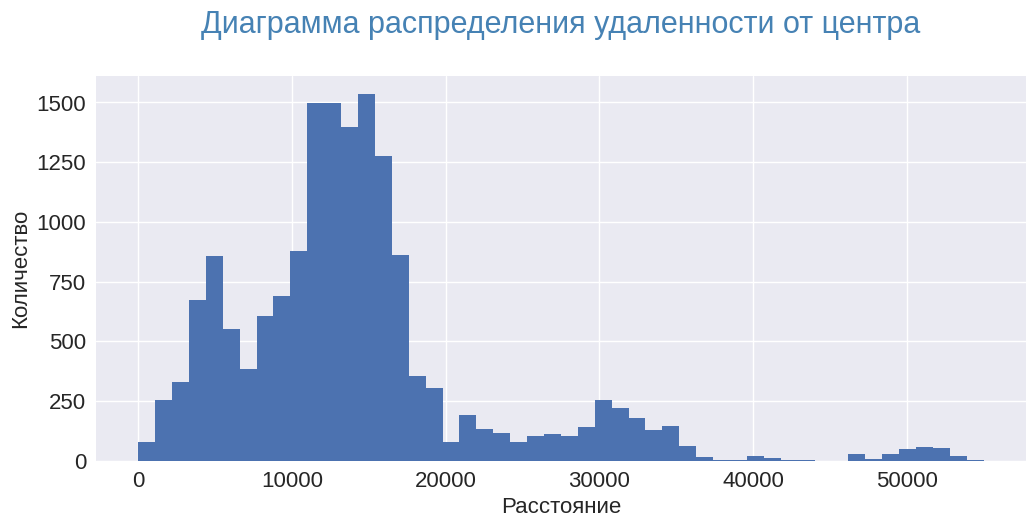

In [ ]:
data.hist('cityCenters_nearest', bins=50, range=(0, 55_000), figsize=(12,5))
plt.title('Диаграмма распределения удаленности от центра' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Расстояние')
plt.ylabel('Количество'); # расстояние до центра города в метрах;

График распределения похож на нормальный закон распределения, но пик значений в районе 7500 м этому высказыванию протеворечит.

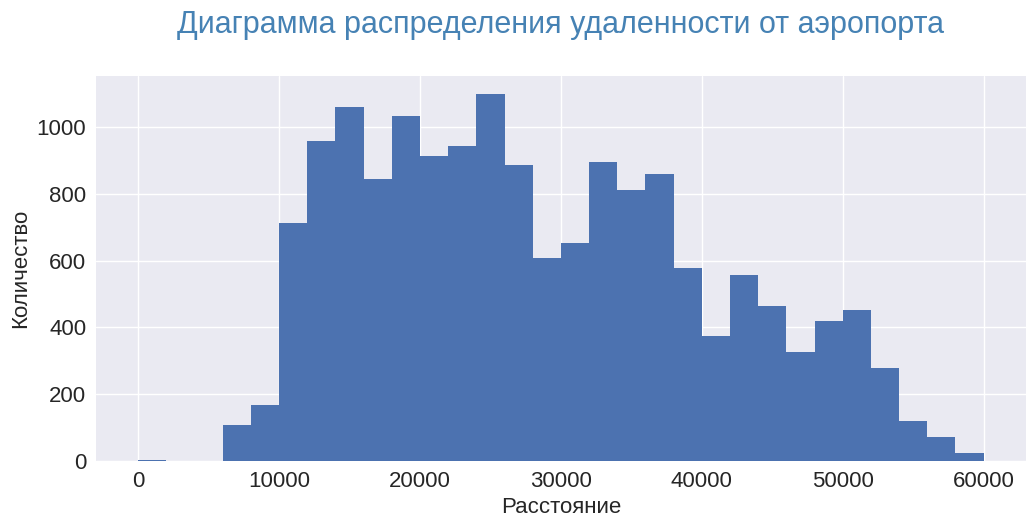

In [ ]:
data.hist('airports_nearest', bins=30, range=(0, 60_000), figsize=(12,5))
plt.title('Диаграмма распределения удаленности от аэропорта' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Расстояние')
plt.ylabel('Количество'); # расстояние до ближайшего аэропорта;

Схожий случай, что и с количеством этажей. На графике представлены несколько пиков в районе 35_000 и 25_000. Если брать промежуток от 10_000 до 40_000, то можно сказать, что график распределения равномерный.

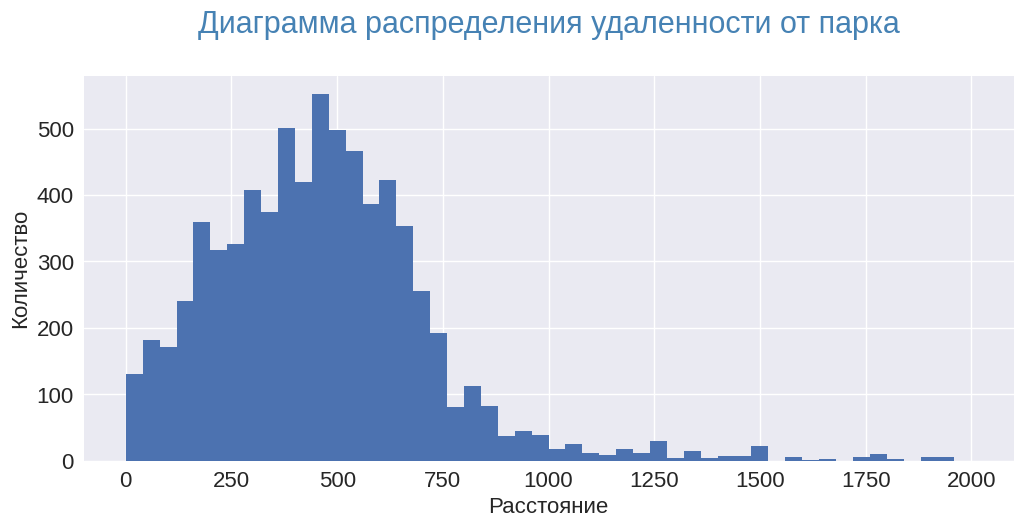

In [ ]:
data.hist('parks_nearest', bins=50, range=(0, 2_000), figsize=(12,5))
plt.title('Диаграмма распределения удаленности от парка' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Расстояние')
plt.ylabel('Количество'); # расстояние до ближайшего парка;

График распределения похож на нормальный закон распределения с мат. ожидание около 450 и смещенный влево.

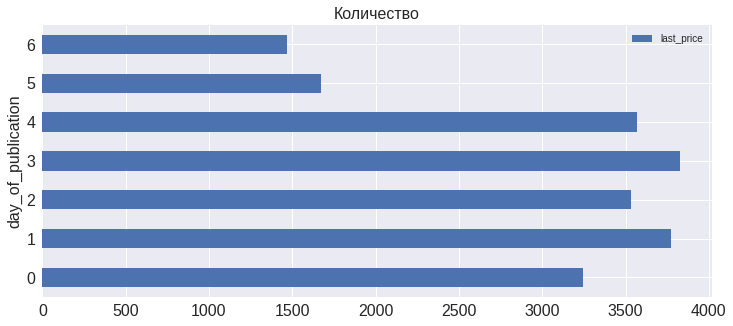

In [ ]:
(
data.pivot_table(index='day_of_publication', values='last_price', aggfunc='count')
     .plot(
        kind='barh',
        grid=True,
        title='Количество',
        figsize=(12,5))
);# день публикации объявления.

Выкладывают объявления чаще в буднии дни, а именно вторник, четверг, пятница. Наименьший показатель в воскресенье.

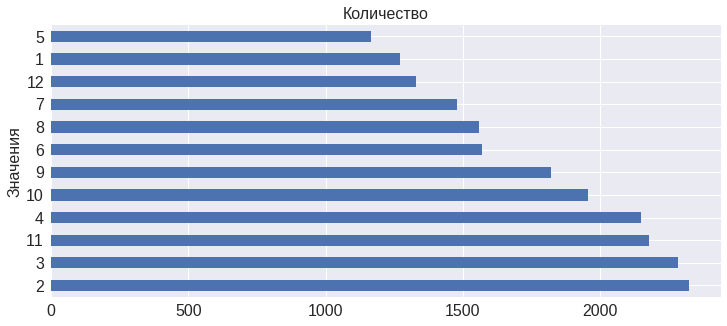

In [ ]:
data['month_of_publication'].value_counts().plot(
    kind='barh',
    grid=True,
    title='Количество',
    ylabel='Значения',
    figsize=(12,5)); # день публикации объявления. можно через groupby() или pivot_table

Публикуют заявление о продаже после нового года, февраль, март, апрель, далее идут октябрь, ноябрь. Наименьше всего в мае.

#### Изучите, как быстро продавались квартиры

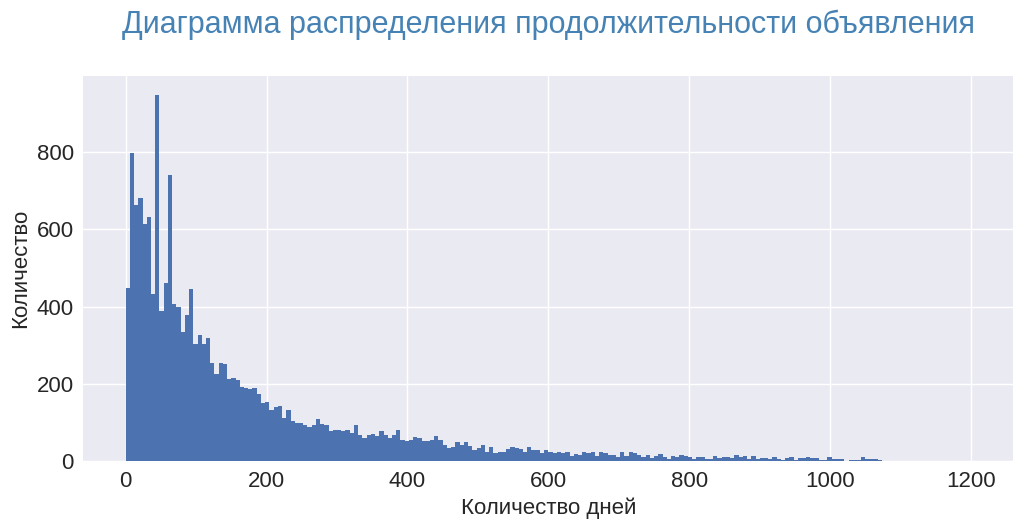

In [ ]:
data.hist('days_exposition', bins=200, range=(0, 1_200), figsize=(12,5))
plt.title('Диаграмма распределения продолжительности объявления' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Количество дней')
plt.ylabel('Количество'); # сколько дней было размещено каждое объявление.

Видим, что есть пики. Это 45, 60, 90 дней. Это максимальный срок размещения объявления на некоторых площадках.

In [ ]:
data['days_exposition'].median() # медиана

100.0

In [ ]:
data['days_exposition'].mean() # среднее

174.70746484353288

In [ ]:
data['days_exposition'].describe() # распределение

count    17991.000000
mean       174.707465
std        196.206610
min          1.000000
25%         44.000000
50%        100.000000
75%        232.000000
max       1070.000000
Name: days_exposition, dtype: float64

In [ ]:
data['days_exposition'].value_counts()

45.0     522
60.0     342
7.0      202
30.0     195
4.0      164
        ... 
976.0      1
597.0      1
987.0      1
951.0      1
971.0      1
Name: days_exposition, Length: 971, dtype: int64

Из распределения и графика видно, что если значение до первого квантиля, а это значения от 1 до 44. То точноможно считать, что квартиру быстро купили. Обычная продажа это 98 дней, ориентируемся на медиану, в виду того, что у нас имеется аномальные значения, которые влиют на среднее. Те чьи объявления превышают 98 дня, то можно считать, что пора делать новые фото квартиры, чтобы заинтересовать покупателя. На самом деле, долгими, здесь можно считать объявления после третьего квантиля, а имено чей срок превышает 232 дней.

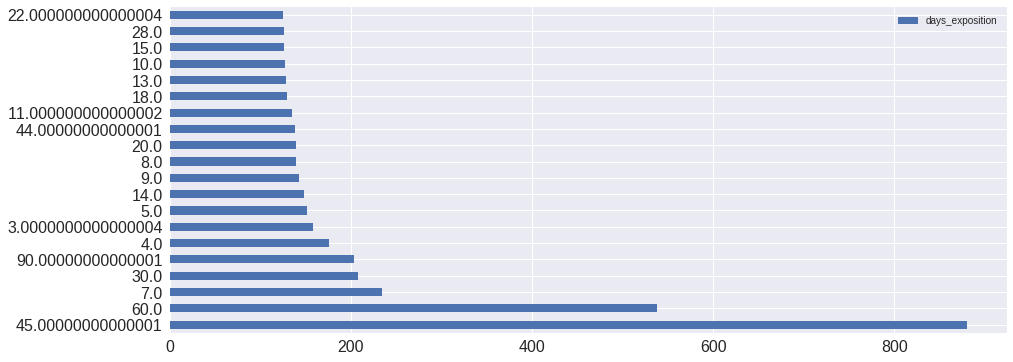

In [ ]:
# check
# Моды на реальных данных

df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [ ]:
df = data[['last_price', 'total_area', 'living_area',
      'kitchen_area', 'rooms', 'floor_type',
      'day_of_publication', 'month_of_publication', 'year_of_publication']] # выдели столбцы, которые нас интересуют
df.corr() # смотрим кореляцию между столбцами

/tmp/ipykernel_930/2972253479.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # смотрим кореляцию между столбцами


,last_price,total_area,living_area,kitchen_area,rooms,day_of_publication,month_of_publication,year_of_publication
last_price,1.000000,0.774102,0.671266,0.558162,0.483224,-0.017193,0.001722,-0.047172
total_area,0.774102,1.000000,0.931090,0.572379,0.787525,-0.013660,0.004027,-0.083826
living_area,0.671266,0.931090,1.000000,0.377004,0.870419,-0.012286,-0.001702,-0.071093
kitchen_area,0.558162,0.572379,0.377004,1.000000,0.221674,-0.010112,0.020245,-0.063336
rooms,0.483224,0.787525,0.870419,0.221674,1.000000,-0.004505,-0.002361,-0.047116
day_of_publication,-0.017193,-0.013660,-0.012286,-0.010112,-0.004505,1.000000,0.008758,-0.004689
month_of_publication,0.001722,0.004027,-0.001702,0.020245,-0.002361,0.008758,1.000000,-0.257584
year_of_publication,-0.047172,-0.083826,-0.071093,-0.063336,-0.047116,-0.004689,-0.257584,1.000000


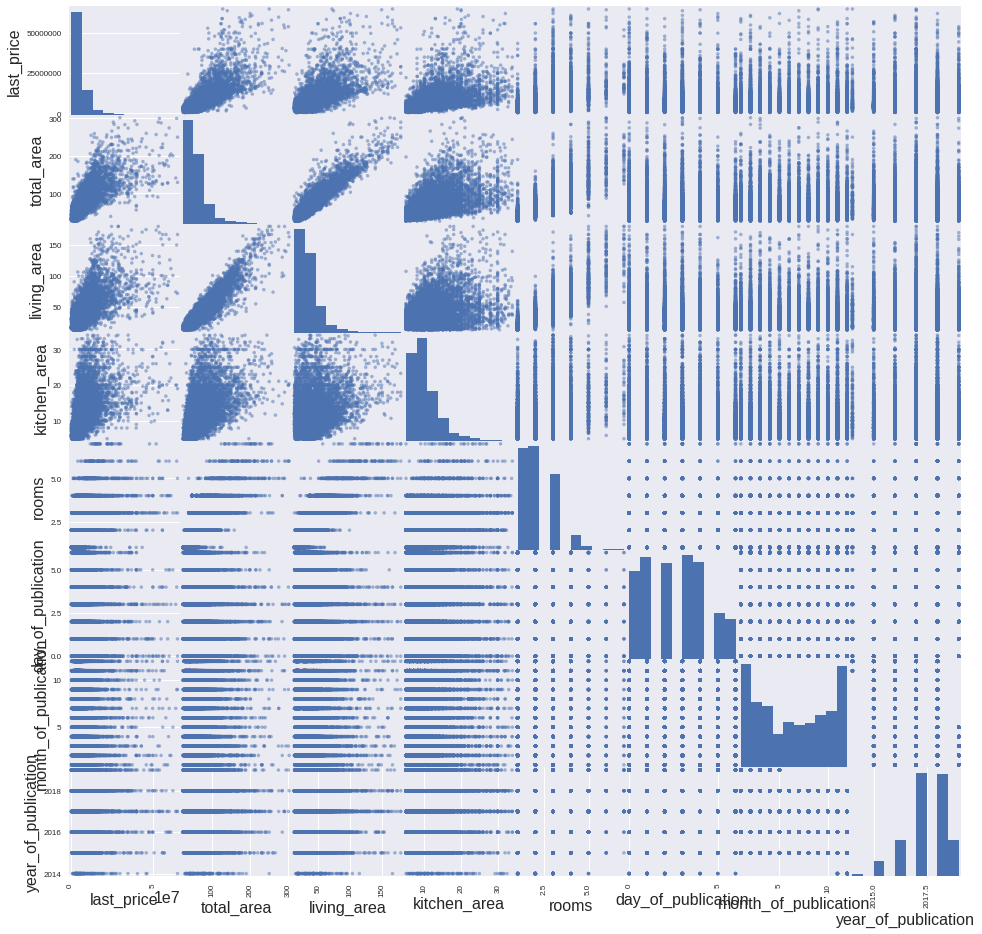

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(16, 16)); # строим диаграммы взаимосвязи

Исходя из графиков и таблицы корреляции можно сделать выводы. От даты размещения стоимость объекта не зависит вовсе, взаимосвязь отсутствует. На цену влияет `total_area`, `living_area`, `kitchen_area` у них средняя взаимосвязь (от 0,5 до 0,7). Слабая взаимосвязь у нас у цены и `rooms` (от 0,3 до 0,5).

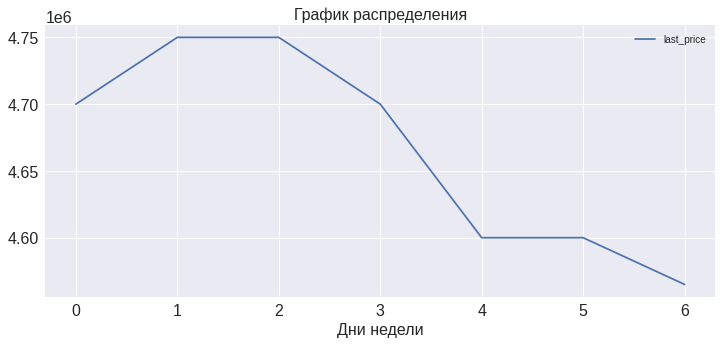

In [ ]:
(
    data
    .pivot_table(index='day_of_publication', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5),title='График распределения', xlabel='Дни недели')
);

In [ ]:
data.pivot_table(index='day_of_publication', values='last_price', aggfunc='median')

,last_price
day_of_publication,
0,4700000.0
1,4750000.0
2,4750000.0
3,4700000.0
4,4600000.0
5,4600000.0
6,4565000.0


Цена зависит от дня недели. Можно сказать, что в начале недели это пик значений, а под конец недели наблюдается спад. И это при том, что у нас самые частые дни это вторник, четверг пятница.

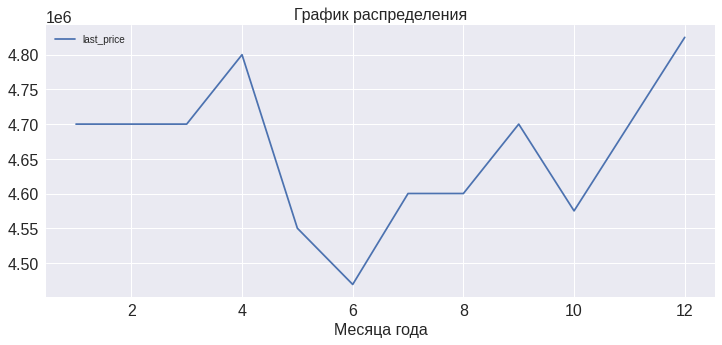

In [ ]:
(
    data
    .pivot_table(index='month_of_publication', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5),title='График распределения', xlabel='Месяца года')
);

In [ ]:
data.pivot_table(index='month_of_publication', values='last_price', aggfunc='median')

,last_price
month_of_publication,
1,4700000.0
2,4700000.0
3,4700000.0
4,4800000.0
5,4550000.0
6,4469000.0
7,4600000.0
8,4600000.0
9,4700000.0


Тут можно сказать, что спрос рождает предложение. У нас пик значений по количетсву это февраль, март и предновогодние месяцы. На графике видно, что в эти месяцы цена выше остальных.

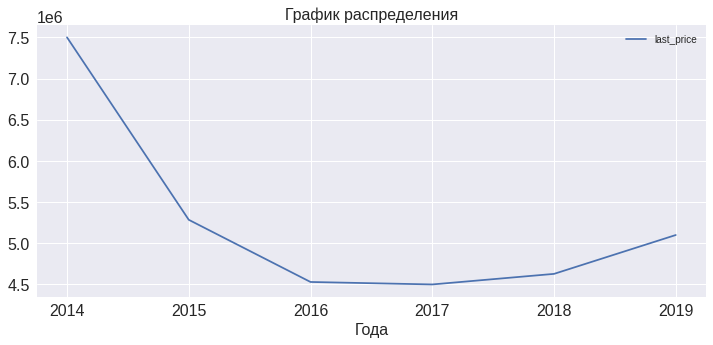

In [ ]:
(
    data
    .pivot_table(index='year_of_publication', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5),title='График распределения', xlabel='Года')
);

In [ ]:
data.pivot_table(index='year_of_publication', values='last_price', aggfunc='median')

,last_price
year_of_publication,
2014,7500000.0
2015,5285000.0
2016,4530000.0
2017,4500000.0
2018,4628270.0
2019,5100000.0


Мы видим резкое падение, потом медленный, но уверенный рост. Понятно, что ситуация связано с экономическим положении страны в целом. Однозначно, от года размещения зависит цена квартиры.

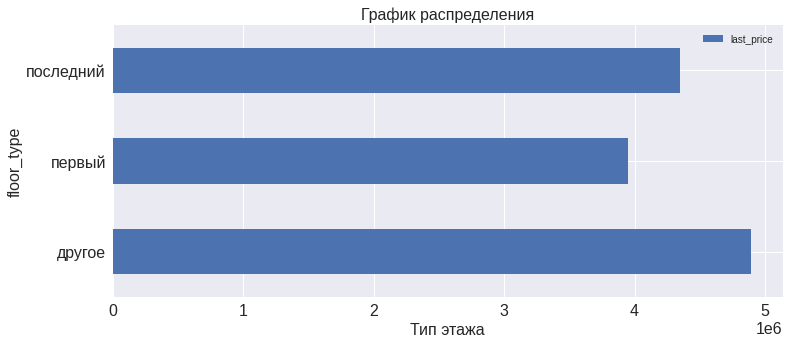

In [ ]:
(
    data
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='barh', grid=True, figsize=(12, 5),title='График распределения', xlabel='Тип этажа')
);

In [ ]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

,last_price
floor_type,
другое,4890000.0
первый,3950134.0
последний,4350000.0


График с точки зрения личного понятен без слов. Самый низкая цена на первом этаже, не удивительно, потом последний этаж и другие.

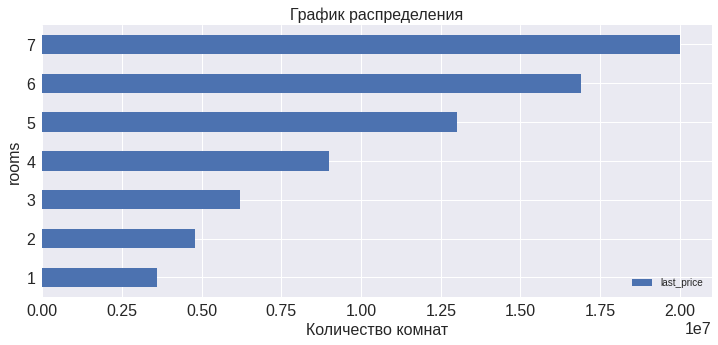

In [ ]:
(
    data
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(kind='barh', grid=True, figsize=(12, 5),title='График распределения', xlabel='Количество комнат')
);

In [ ]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median')

,last_price
rooms,
1,3600000.0
2,4793000.0
3,6190000.0
4,8990000.0
5,13000000.0
6,16900000.0
7,20000000.0


Чем больше комнат, тем дороже квартира. Можно было подумать, но чем больше комнат тем больше площадь и логично что цена повышается от этого.

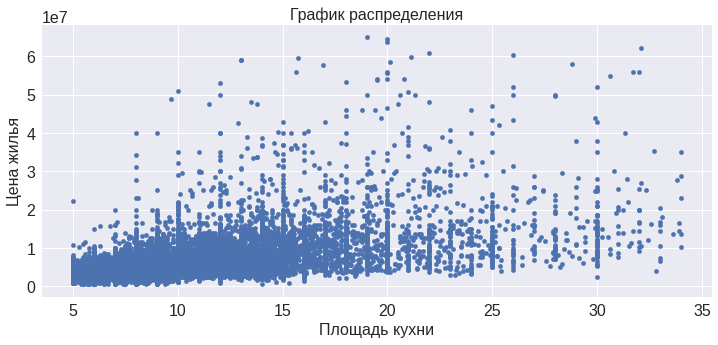

In [ ]:
data.plot(kind='scatter',
          x='kitchen_area',
          y='last_price',
          grid=True,
          figsize=(12, 5),
          title='График распределения',
          xlabel='Площадь кухни',
          ylabel='Цена жилья'
);


При малых значения площади кухни, можно сказать точки упорядочиваются в линию, но также при увелечении значений появляются выбросы. Взаимосвязь есть и не раз подтверждали это.

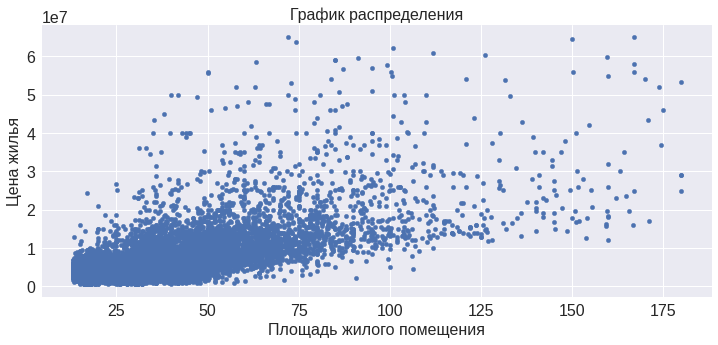

In [ ]:
data.plot(kind='scatter',
          x='living_area',
          y='last_price',
          grid=True,
          figsize=(12, 5),
          title='График распределения',
          xlabel='Площадь жилого помещения',
          ylabel='Цена жилья'
);


На этом графике по сравнению с предыдущим дела обстоят лучше, если мы хотим выделить какую-то взаимосвязь, опять только же на малых значения. Но очевидно что при увеличении площади цена увеличивается.

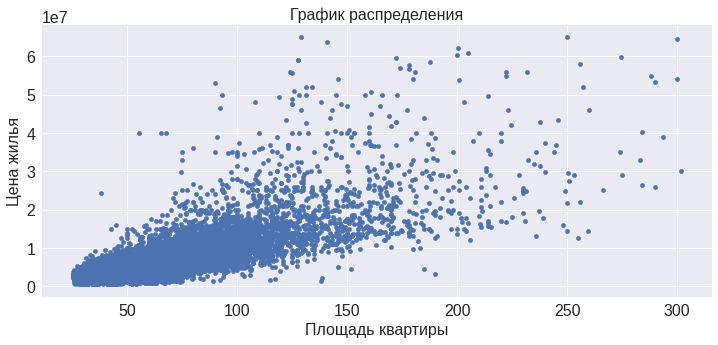

In [ ]:
data.plot(kind='scatter',
          x='total_area',
          y='last_price',
          grid=True,
          figsize=(12, 5),
          title='График распределения',
          xlabel='Площадь квартиры',
          ylabel='Цена жилья'
);

По сравнению с площадью жилого помощения, видим, что точки более компатно построены. А так аналогичные выводы, что и по предыдущему графику.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
data_group = data.pivot_table(index='locality_name', values='price_per_one', aggfunc=['count', 'mean']) # группируем, и считаем данные
data_group.columns = ['count', 'price_per_one'] # перемеименовываем столбцы
data_group = data_group.round(2)
data_group.sort_values(by='count', ascending=False).head(11) # выводим топ 10 по количеству.

,count,price_per_one
locality_name,,
Санкт-Петербург,14157,111927.12
Мурино,467,85577.38
Шушары,387,77796.50
Кудрово,381,95144.88
Всеволожск,361,68870.06
Пушкин,341,103387.34
Колпино,325,75173.35
Гатчина,291,68825.75
Парголово,281,90169.06


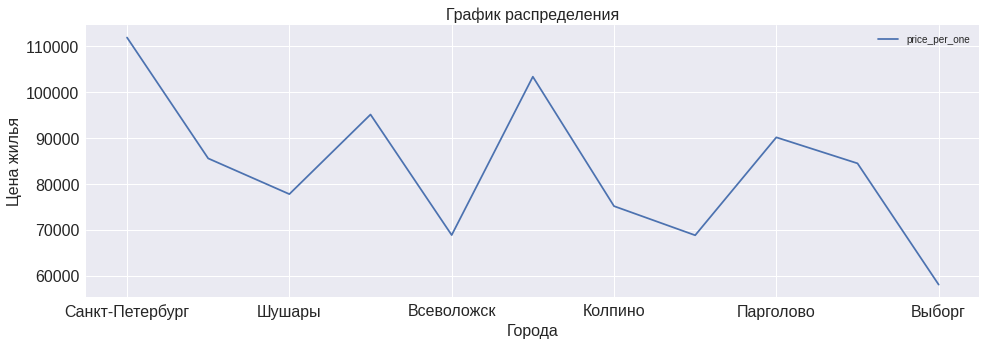

In [ ]:
data_group.sort_values(by='count', ascending=False).head(11).plot(
    y='price_per_one',
    grid=True,
    figsize=(16, 5),
    title='График распределения',
    xlabel='Города',
    ylabel='Цена жилья'
);

Самый высокий показатель оказался у Санкт-Петербурга (106850 рублей за метр), а самый низкий у Выборга	(58069 рублей за метр)

#### Опишите, как стоимость объектов зависит от расстояния до центра города.

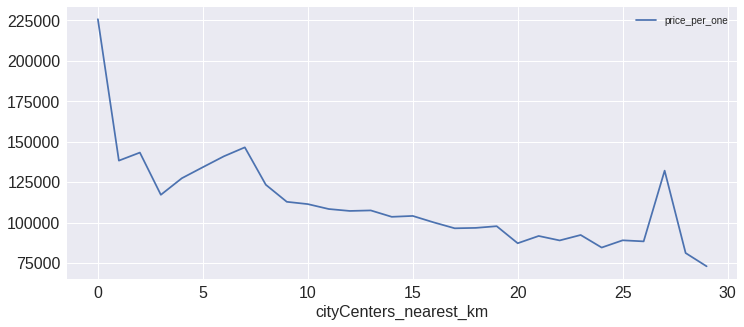

In [ ]:
(
data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='price_per_one')
    .plot(grid=True, figsize=(12, 5))
);

У нас получился график, однозначно можно сказать, что при увеличении раcстояния, график будет стремиться к ассимптоте по оси абцисс. Хотя функция не является монотонной на всем промежутке, но все дело в выбросах данных.

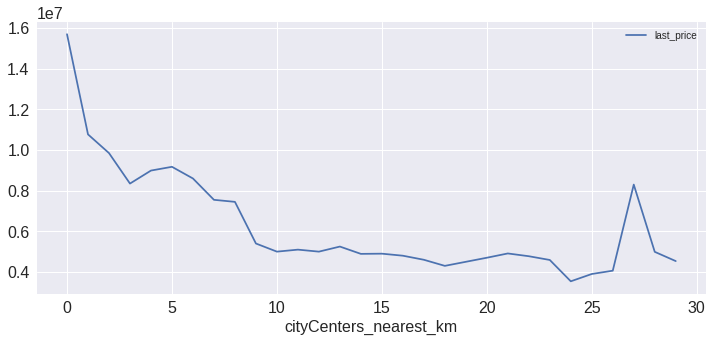

In [ ]:
(
data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

<div class="alert alert-info">
График похож на график, где брали от стоимости за 1 квадратный метр, опять выбросы на 27 км.
<div>

In [ ]:
value = [3, 5]
data.query('cityCenters_nearest_km == 27 & locality_name == "Санкт-Петербург"') # секрет в том, что квартира за 14 млн рублей туда входит в срез.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name,price_per_one,day_of_publication,month_of_publication,year_of_publication,floor_type,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,True,...,0,NaN,128.0,Санкт-Петербург,193918.918919,1,11,2017,другое,27.0
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,True,...,0,NaN,178.0,Санкт-Петербург,70312.500000,1,2,2018,последний,27.0


In [ ]:
value = [3, 5]
test = data.query('cityCenters_nearest_km in @value & locality_name == "Санкт-Петербург"')
# значений на 3 и на 5 значительно различаются в два раза. Категорий квартир с более дешевой стоимостью намного больше на 3-м километре,
#чем на пятом, возможно отсюда падение и пик...

In [ ]:
# способы группировки и сортировки информации

(
    data
     .query('locality_name == "Санкт-Петербург"')
     .query('3 <= cityCenters_nearest_km <=5 ')
     .groupby(['cityCenters_nearest_km', 'floor_type'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

### Общий вывод

**Мы произвели предобработку данных: удаление пропусков, обработка аномальных значений, изменение типов данных, обработка дубликатов, категоризация данных.**

**Так же мы исследовали различные взаимосвязи данных:**
- **Цена на недвижимость зависит от многих факторов, в числе которых общая площадь, жилая площадь, площадь кухни, количество комнат.**
- **Цена на недвижимость в Санкт-Петербурге напрямую зависит от отдаленности от центра города.**
- **Цена за 1 квадратный метр в Санкт-Петербурге самая дорогая и состовляет 106850 рублей за метр, а самый низкая цена в Выборге (58381 рублей за метр).**
- **Обычная продажа квартиры состовляет 98 дней. При этом быстрым считается, если квартиру продали за 44 дня.**
- **Покупатели не так часто покупают квартиры, на первом и на последнем этаже зданий.**